In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import path
import os
import pathlib

from thermodat.dataio import RxnObs
from thermodat.dataio import load_processed_rxn_data


import re



In [52]:
def plot_rxn_data(data_summary, show_errors=False, T_scl=5, P_scl=.1, cmap_name='Dark2',
                  show_rxns=None, ms=10):
    grp = data_summary.groupby(['rxn_dir'])
    
    cmap = plt.get_cmap(cmap_name)
    rxn_uniq = np.unique([igrp.rxn for igrp in grp.groups])
    
    # rxn_dir = data_summary.apply(lambda x:x['rxn_dir'].rxn_dir, axis=1)
    
    plt.figure()
    
    for igrp in grp.groups:
        idat = grp.get_group(igrp)
        irxn_dir = igrp.rxn_dir
        irxn = igrp.rxn
        
        if show_rxns is not None:
            if irxn not in show_rxns:
                continue
        
        ind_col = np.where(rxn_uniq==irxn)[0]
        icolor = cmap.colors[ind_col]
        
        if irxn_dir.startswith('FWD'):
            idir = +1
        elif irxn_dir.startswith('REV'):
            idir = -1
        else:
            idir = 0
            
        iuncertain = False
        if irxn_dir.endswith('?'):
            iuncertain = True
            
        idir = idir*igrp.high_T_dir
        
        if iuncertain:
            isty = 'none'
        else:
            isty = 'full'
            
        if idir==+1:
            ifmt = '<'
        elif idir == -1:
            ifmt = '>'
        else:
            ifmt = 's'
            isty = 'none'
            
        imask = idat['valid'].values
        iNdat = np.sum(imask)
        
        Tjit = T_scl*np.random.randn(iNdat)
        Pjit = P_scl*np.random.randn(iNdat)
        if irxn_dir != 'VOID':
            if show_errors:
                plt.errorbar(idat['T'][imask]+Tjit, idat['P'][imask]+Pjit, fmt=ifmt,
                             xerr=idat['T_err'][imask], yerr=idat['P_err'][imask],  
                             fillstyle=isty, color=icolor, label=irxn, ms=ms)
            else:
                plt.plot(idat['T'][imask]+Tjit, idat['P'][imask]+Pjit, ifmt, 
                         fillstyle=isty, color=icolor, label=irxn, ms=ms)
                
    plt.xlabel('Temperature  (C)')
    plt.ylabel('Pressure  (kbar)')
        

In [53]:
data_summary = pd.DataFrame()
data_summary = load_processed_rxn_data('Richardson1968.xlsx', data_summary)
data_summary = load_processed_rxn_data('Richardson1969.xlsx', data_summary)
data_summary = load_processed_rxn_data('Holdaway1971.xlsx', data_summary)
data_summary = load_processed_rxn_data('Bohlen1991.xlsx', data_summary)
data_summary = load_processed_rxn_data('Bowman1975.xlsx', data_summary)
data_summary = load_processed_rxn_data('Heninger1984.xlsx', data_summary)
data_summary = load_processed_rxn_data('Holdaway1971.xlsx', data_summary)
data_summary = load_processed_rxn_data('Newton1966.xlsx', data_summary)
data_summary = load_processed_rxn_data('Newton1966b.xlsx', data_summary)
data_summary = load_processed_rxn_data('Newton1969.xlsx', data_summary)
data_summary = load_processed_rxn_data('Richardson1968.xlsx', data_summary)
data_summary = load_processed_rxn_data('Richardson1969.xlsx', data_summary)
data_summary = load_processed_rxn_data('Weill1966.xlsx', data_summary)
# data_summary = data_summary.append(load_processed_rxn_data(


In [54]:
data_summary.head()

pub_id  index run_id    P    T P_err T_err cond_bias cond_bias_dir  \
0  Richardson1968      1   KS16   10  750   0.2     5       NaN           NaN   
1  Richardson1968      2   KS17   10  750   0.2     5       NaN           NaN   
2  Richardson1968      3   KS18   10  750   0.2     5       NaN           NaN   
3  Richardson1968      4   KS19   10  750   0.2     5       NaN           NaN   
4  Richardson1968      5   KS20  7.5  750  0.05     5       NaN           NaN   

  results      rxns rxn_bias rxn_bias_dir  \
0     Ky+  Ky = Sil      NaN          NaN   
1     Ky+  Ky = Sil      NaN          NaN   
2     Ky+  Ky = Sil      NaN          NaN   
3     Ky+  Ky = Sil      NaN          NaN   
4     Ky=  Ky = Sil      NaN          NaN   

                                  rxn_dir net_bias_dir  valid  
0  RxnObs('1Ky = 1Sil', result_str='REV')         NONE   True  
1  RxnObs('1Ky = 1Sil', result_str='REV')         NONE   True  
2  RxnObs('1Ky = 1Sil', result_str='REV')         NONE   True  
3  RxnObs('1Ky = 1Sil', result_str='REV')         NONE   True  
4   RxnObs('1Ky = 1Sil', result_str='NC')         NONE   True

In [55]:
grp = data_summary.groupby('rxn_dir')
np.unique([igrp.rxn for igrp in grp.groups])

array(['1And = 1Ky', '1And = 1Sil', '1Ky = 1Sil'], 
      dtype='<U11')

/Users/aswolf/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


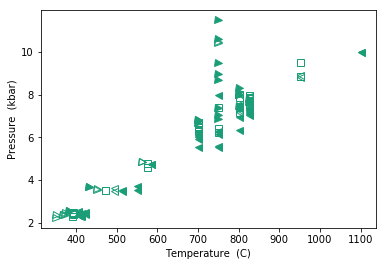

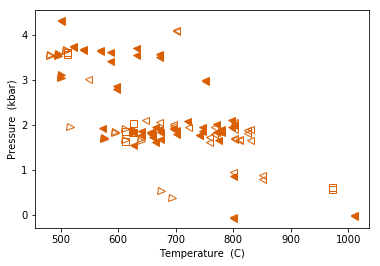

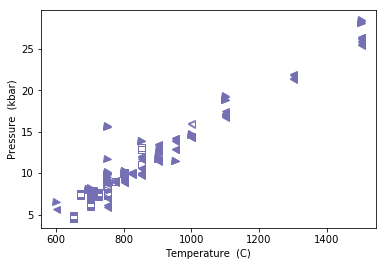

In [61]:
ms=7
show_errors=False
T_scl = 0
P_scl = 0.1
plot_rxn_data(data_summary, T_scl=T_scl, P_scl=P_scl, cmap_name='Dark2', 
              show_rxns=['1And = 1Ky'],ms=ms, show_errors=show_errors)
plot_rxn_data(data_summary, T_scl=T_scl, P_scl=P_scl, cmap_name='Dark2', 
              show_rxns=['1And = 1Sil'],ms=ms, show_errors=show_errors)
plot_rxn_data(data_summary, T_scl=T_scl, P_scl=P_scl, cmap_name='Dark2', 
              show_rxns=['1Ky = 1Sil'],ms=ms, show_errors=show_errors)
# plt.ylim(-1,1)